### CSE-221710302064 - Vishnu Pulipaka

# Problem statement: 
    Predicting the sentiment of sample twitter data as positive or negative in sentiment

### Twitter Sentiment Analysis

In [2]:
# Importing Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [3]:
# Reading the dataset
tweets=pd.read_csv("train.csv",encoding = 'latin - 1')
tweets.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
tweets.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

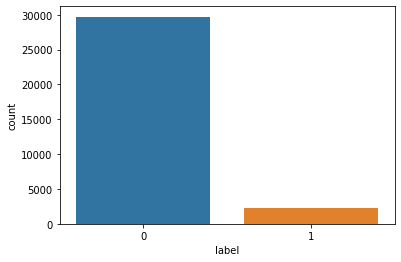

In [5]:
sns.countplot(tweets.label)

In [6]:
# Checking size of dataset
tweets.shape

(31962, 3)

In [7]:
# Checking for NULL values
tweets.isna().sum() # No NULL Values can be found

id       0
label    0
tweet    0
dtype: int64

In [8]:
# Checking Statistical data 
tweets.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


#### Cleaning with nltk

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# Removing Stopwords
# stopwords are words like [a, an ,the ,is ,are...etc] that are not useful for the prediction
from nltk.corpus import stopwords
stop=stopwords.words("english")
stop.extend(["i'm","I'm"])

tweets.tweet=tweets.tweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
tweets.head()

,id,label,tweet
0,1,0,@user father dysfunctional selfish drags kids ...
1,2,0,@user @user thanks #lyft credit can't use caus...
2,3,0,bihday majesty
3,4,0,#model love u take u time urÃ°ÂÂÂ±!!! Ã°ÂÂ...
4,5,0,factsguide: society #motivation


In [11]:
# a function to clear the text data from user-mentions , special characters, hyperlinks
# using regular expressions
def clean(x):
    x=' '.join(re.sub("(@[A-Za-z0-9]+)|([^A-Za-z0-9']+)|(\w+:\/\/\S+)"," ",x).split())
    return x
clean('@WillSmith https://www.youtube.com/watch?v=p1ccbR2P_xA $$')

''

In [12]:
# Removing Hyperlinks, userIDS
tweets.tweet = tweets.tweet.apply(clean)
tweets.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfun...
1,2,0,user thanks lyft credit can't use cause offer ...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Applying Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
wnl = WordNetLemmatizer()
tweets.tweet=tweets.tweet.apply(lambda x:' '.join([wnl.lemmatize(word,'v') for word in x.split()])) # v stands for verb
tweets.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drag kid dysfunct...
1,2,0,user thank lyft credit can't use cause offer w...
2,3,0,bihday majesty
3,4,0,model love u take u time ur
4,5,0,factsguide society motivation


In [15]:
# all words converted to lower case
tweets.tweet=tweets.tweet.apply(lambda x:' '.join([word.lower() for word in x.split()]))

#### Applying same techniques for test data for cleaning

In [16]:
#reading test data input into X_test
X_test = pd.read_csv('test.csv',encoding='latin- 1')
# Removing Stopwords
X_test.tweet=X_test.tweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
# Removing Hyperlinks, userIDS
X_test.tweet = X_test.tweet.apply(clean)
# Applying Lemmatization
wnl1 = WordNetLemmatizer()
X_test.tweet=X_test.tweet.apply(lambda x:' '.join([wnl1.lemmatize(word,'v') for word in x.split()])) # v stands for verb
X_test.tweet=X_test.tweet.apply(lambda x:' '.join([word.lower() for word in x.split()]))

#### Reading result data

In [17]:
# reading the test output into y_test
y_test = pd.read_csv('result.csv')

#### Applying TFIDF Vectorizer for train and test data

In [18]:
## Importing TF IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [19]:
#Applying tfidf to train data
new_inp = tfidf.fit_transform(tweets.tweet)
new_inp
#Applying tfidf to test data
test_inp = tfidf.transform(X_test.tweet)
test_inp

<17197x35865 sparse matrix of type '<class 'numpy.float64'>'
	with 123657 stored elements in Compressed Sparse Row format>

#### SMOTE  Syntheic minority oversampling technique

In [20]:
# importing the SMOTE tool
from imblearn.combine import SMOTETomek

# creating an object
smk = SMOTETomek(random_state=42)

# generating the input and output training data after applying the sythentic generation 
X_train,y_train=smk.fit_sample(new_inp,tweets.label)

In [21]:
print(X_train.shape)
print(y_train.shape)

(59440, 35865)
(59440,)


In [22]:
check=pd.DataFrame(y_train)          # converting y_train from np.array to data frame to check for the balancing outcome
check.iloc[:,0].value_counts()       #  using index to generate counts of the label

## we can see that both the labels are no equalized

1    29720
0    29720
Name: label, dtype: int64

In [23]:
tweets.label.value_counts()

## the label counts of the original data before synthetic generation.

0    29720
1     2242
Name: label, dtype: int64

### Logistic regression

In [24]:
# importing the model
from sklearn.linear_model import LogisticRegression

# creating object
reg=LogisticRegression()

# fitting object on training data
reg.fit(X_train,y_train)

LogisticRegression()

In [25]:
#predicting on train data
lg_train_pred=reg.predict(X_train)
#predicting on test data
lg_test_pred=reg.predict(test_inp)

In [26]:
# Classification report on train and test
from sklearn.metrics import classification_report,recall_score
print("on training data :")
print(classification_report(y_train,lg_train_pred,digits=4))
print('----------------------------------------------------------------')
print('on testing data :')
print(classification_report(y_test.label,lg_test_pred,digits=4))

on training data :
              precision    recall  f1-score   support

           0     0.9672    0.9681    0.9676     29720
           1     0.9680    0.9672    0.9676     29720

    accuracy                         0.9676     59440
   macro avg     0.9676    0.9676    0.9676     59440
weighted avg     0.9676    0.9676    0.9676     59440

----------------------------------------------------------------
on testing data :
              precision    recall  f1-score   support

           0     0.9960    0.9396    0.9670     16282
           1     0.4646    0.9333    0.6204       915

    accuracy                         0.9392     17197
   macro avg     0.7303    0.9364    0.7937     17197
weighted avg     0.9678    0.9392    0.9485     17197



In [27]:
recall_score(y_test.label,lg_test_pred)

0.9333333333333333

In [28]:
## Hyper parameter turing for Logistic Regression

## Hyper parameter turing for Logistic Regression

In [29]:
# Taking Parameters for performing HyperParameter Tuning
dual=[True,False]
max_iter= [800]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

In [30]:
# Creating New Object for Hyper Parameter Tuning
new_lr = LogisticRegression(penalty='l2')
# Importing GridSearchCV for finding Best parameters
from sklearn.model_selection import GridSearchCV
# Initializing Object for GridSearchCV 
grid_search = GridSearchCV(estimator=new_lr, param_grid=param_grid, cv = 3, n_jobs=-1)
# Fitting grid_search on Train data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1.0, 1.5, 2.0, 2.5], 'dual': [True, False],
                         'max_iter': [800]})

In [31]:
grid_search.best_params_

{'C': 2.5, 'dual': False, 'max_iter': 800}

In [32]:
# creating a model with generated best parameters
new_lr=LogisticRegression(C=2.5,dual=False,max_iter=800)

# fitting on training data:
new_lr.fit(X_train,y_train)

LogisticRegression(C=2.5, max_iter=800)

In [33]:
# prediciton on training data
y_train_pred_tuned_LR=new_lr.predict(X_train)

# predicition on testing data
y_test_pred_tuned_LR=new_lr.predict(test_inp)

In [34]:
# Classification report on train and test
from sklearn.metrics import classification_report
print("on training data: ")
print(classification_report(y_train,y_train_pred_tuned_LR,digits=4))
print("on testing data: ")
print('----------------------------------------------------------------')
print(classification_report(y_test.label,y_test_pred_tuned_LR,digits=4))

on training data: 
              precision    recall  f1-score   support

           0     0.9889    0.9797    0.9843     29720
           1     0.9799    0.9890    0.9844     29720

    accuracy                         0.9844     59440
   macro avg     0.9844    0.9844    0.9844     59440
weighted avg     0.9844    0.9844    0.9844     59440

on testing data: 
----------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9941    0.9437    0.9683     16282
           1     0.4736    0.9005    0.6207       915

    accuracy                         0.9414     17197
   macro avg     0.7338    0.9221    0.7945     17197
weighted avg     0.9664    0.9414    0.9498     17197



### Multinomial NB

In [35]:
# import BernNB
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [36]:
#predicting on train data
mnb_train_pred=mnb.predict(X_train)
#predicting on test data
mnb_test_pred=mnb.predict(test_inp)

In [37]:
# Classification report on train and test
from sklearn.metrics import classification_report
print(classification_report(y_train,mnb_train_pred))
print('----------------------------------------------------------------')
print(classification_report(y_test.label,mnb_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     29720
           1       0.95      0.99      0.97     29720

    accuracy                           0.97     59440
   macro avg       0.97      0.97      0.97     59440
weighted avg       0.97      0.97      0.97     59440

----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     16282
           1       0.36      0.90      0.52       915

    accuracy                           0.91     17197
   macro avg       0.68      0.91      0.74     17197
weighted avg       0.96      0.91      0.93     17197



In [38]:
# recall on test data
from sklearn.metrics import recall_score
recall_score(y_test.label,mnb_test_pred)

0.9027322404371585

## Decision tree Classifier

In [39]:
# import the library
from sklearn.tree import DecisionTreeClassifier
# create object
dtree=DecisionTreeClassifier(criterion='entropy')
# fitting the data
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [40]:
#predicting on train data
dtree_train_pred=dtree.predict(X_train)
#predicting on test data
dtree_test_pred=dtree.predict(test_inp)

In [41]:
# Classification report on train and test
from sklearn.metrics import classification_report
print("on training data")
print(classification_report(y_train,dtree_train_pred,digits=4))
print("on testing data")
print('----------------------------------------------------------------')
print(classification_report(y_test.label,dtree_test_pred,digits=4))

on training data
              precision    recall  f1-score   support

           0     0.9998    1.0000    0.9999     29720
           1     1.0000    0.9998    0.9999     29720

    accuracy                         0.9999     59440
   macro avg     0.9999    0.9999    0.9999     59440
weighted avg     0.9999    0.9999    0.9999     59440

on testing data
----------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9783    0.9680    0.9731     16282
           1     0.5207    0.6186    0.5654       915

    accuracy                         0.9494     17197
   macro avg     0.7495    0.7933    0.7693     17197
weighted avg     0.9540    0.9494    0.9514     17197



## Hyper tuning from Decision Tree

In [3]:
#  setting range of parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1)
    
}

In [ ]:
#Import the GridSearchCV 
from sklearn.model_selection import GridSearchCV

# initialization of GridSearch with the parameters- ModelName and the dictionary of parameters
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=grid_param,n_jobs=-1,cv=3,verbose=2)

# applying gridsearch onto dataset
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed: 32.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
# generating best params
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 1}

In [42]:
# creating model with best parameters:
clf=DecisionTreeClassifier(criterion='gini',max_depth=31,min_samples_leaf=1)

In [43]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=31)

In [44]:
## predicting on training:
y_train_pred_tuned=clf.predict(X_train)
## predicting on testing data:
y_test_pred_tuned=clf.predict(test_inp)

In [45]:
# Classification report on train and test after hyper tuning for decision tree
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred_tuned,digits=4))
print('----------------------------------------------------------------')
print(classification_report(y_test.label,y_test_pred_tuned,digits=4))

              precision    recall  f1-score   support

           0     0.8560    0.9921    0.9190     29720
           1     0.9906    0.8330    0.9050     29720

    accuracy                         0.9126     59440
   macro avg     0.9233    0.9126    0.9120     59440
weighted avg     0.9233    0.9126    0.9120     59440

----------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9836    0.9713    0.9774     16282
           1     0.5818    0.7115    0.6401       915

    accuracy                         0.9574     17197
   macro avg     0.7827    0.8414    0.8087     17197
weighted avg     0.9622    0.9574    0.9594     17197



In [46]:
# Classification report on train and test before hyper tuning for decision tree.
from sklearn.metrics import classification_report
print(classification_report(y_train,dtree_train_pred,digits=4))
print('----------------------------------------------------------------')
print(classification_report(y_test.label,dtree_test_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9998    1.0000    0.9999     29720
           1     1.0000    0.9998    0.9999     29720

    accuracy                         0.9999     59440
   macro avg     0.9999    0.9999    0.9999     59440
weighted avg     0.9999    0.9999    0.9999     59440

----------------------------------------------------------------
              precision    recall  f1-score   support

           0     0.9783    0.9680    0.9731     16282
           1     0.5207    0.6186    0.5654       915

    accuracy                         0.9494     17197
   macro avg     0.7495    0.7933    0.7693     17197
weighted avg     0.9540    0.9494    0.9514     17197



# AUC-ROC for Logistic Regression

In [69]:
# calculating the class probability for one class
y_test_prob_log_reg=new_lr.predict_proba(test_inp)
y_test_prob_log_reg=pd.DataFrame(y_test_prob_log_reg)
y_test_prob_log_reg=y_test_prob_log_reg.iloc[:,1]

In [70]:
# obtaining false Positive rate,true positive rate and threshold.
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, threshold = roc_curve(y_test.label,y_test_prob_log_reg)

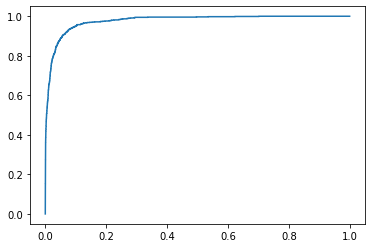

In [71]:
# plotting the curve
plt.plot(fpr,tpr)

In [72]:
# roc_auc score
roc_auc_score(y_test.label,y_test_prob_log_reg)

0.9768890920477405

# AUC-ROC for Decision tree classifier 

In [74]:
# calculating the class probability for one class
y_prob_d_Tree=clf.predict_proba(test_inp)
y_prob_d_Tree=pd.DataFrame(y_prob_d_Tree)
y_prob_d_Tree=y_prob_d_Tree.iloc[:,1]

In [75]:
# obtaining false Positive rate,true positive rate and threshold.
fpr, tpr, threshold = roc_curve(y_test.label,y_prob_d_Tree)

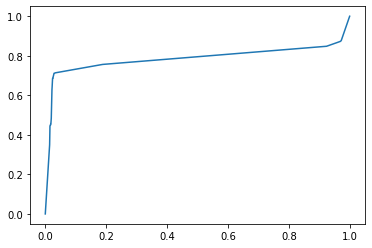

In [76]:
#plotting the curve
plt.plot(fpr,tpr)

In [77]:
# roc_auc score
roc_auc_score(y_test.label,y_prob_d_Tree)

0.7857406650409483

Comparing the accuracies: 
	Multinomial Naive Bayes - 0.91 on test data
	Decision Tree - 0.958 after parameter tuning.
	Logistic Regression - 0.9390 after parameter tuning .
Since Multinomial Naive Bayes has the least accuracy among the three, it is eliminated. 

From observing the AUCROC curve, Logistic regression has more area under the curve as we can see above,hence,it
is concluded that Logistic Regression is the best suitable algorithm


In [47]:
!pip install GetOldTweets3

In [48]:
import GetOldTweets3 as got
tag=input("Enter the topic to run sentiment analysis on :")
limit=1000

Enter the topic to run sentiment analysis on :feminist movement


In [49]:
# setting search criteria using tweetCriteria model
tweetCriteria = got.manager.TweetCriteria().setQuerySearch(tag)\
                                           .setMaxTweets(limit)             

# get tweets using getTweets method:
tweet = got.manager.TweetManager.getTweets(tweetCriteria)

In [50]:
# converting the "data" and "text" attributes from model to list of lists:
tweet_in = [[i.date, i.text] for i in tweet]

In [51]:
# converting the list of lists to dataframe:
tweet_in=pd.DataFrame(tweet_in,columns=["time","text"])
tweet_in.head()

,time,text
0,2020-07-28 15:15:15+00:00,“The feminist movement has provided women with...
1,2020-07-22 07:30:00+00:00,Galaxy & BTS unite! Introducing the exclusive ...
2,2020-07-28 15:05:33+00:00,That’s not his first tweet I have seen against...
3,2020-07-28 15:02:03+00:00,#challengeaccepted is the black square of the ...
4,2020-07-28 15:00:42+00:00,Reading about the start of the sexual revoluti...


In [52]:
str(tweet_in.iloc[0,0]).split(" ")

['2020-07-28', '15:15:15+00:00']

In [53]:
tweet_in.head()

,time,text
0,2020-07-28 15:15:15+00:00,“The feminist movement has provided women with...
1,2020-07-22 07:30:00+00:00,Galaxy & BTS unite! Introducing the exclusive ...
2,2020-07-28 15:05:33+00:00,That’s not his first tweet I have seen against...
3,2020-07-28 15:02:03+00:00,#challengeaccepted is the black square of the ...
4,2020-07-28 15:00:42+00:00,Reading about the start of the sexual revoluti...


In [54]:
#making the predictions by converting the dataFrame by using tfidf vectorizer
real_world_pred=new_lr.predict(tfidf.transform(tweet_in.iloc[:,1]))

In [55]:
# Creating the output column
tweet_in['label']=real_world_pred

In [56]:
tweet_in.head()

,time,text,label
0,2020-07-28 15:15:15+00:00,“The feminist movement has provided women with...,1
1,2020-07-22 07:30:00+00:00,Galaxy & BTS unite! Introducing the exclusive ...,0
2,2020-07-28 15:05:33+00:00,That’s not his first tweet I have seen against...,1
3,2020-07-28 15:02:03+00:00,#challengeaccepted is the black square of the ...,1
4,2020-07-28 15:00:42+00:00,Reading about the start of the sexual revoluti...,0


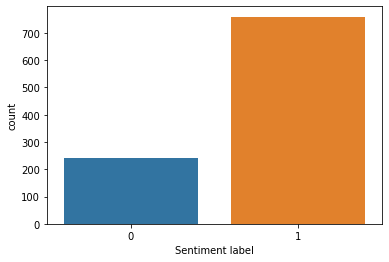

In [57]:
import matplotlib.pyplot as plt
plt.xlabel("Sentiment label")
plt.ylabel("count")
sns.countplot(real_world_pred)
# 0- positive tweets
# 1- negative tweets
plt.show()

# Observations :
  - The topic "feminist movement" have a 1:3 positive:negative sentiment
  

In [80]:
tweet_in.label.value_counts()

1    759
0    241
Name: label, dtype: int64

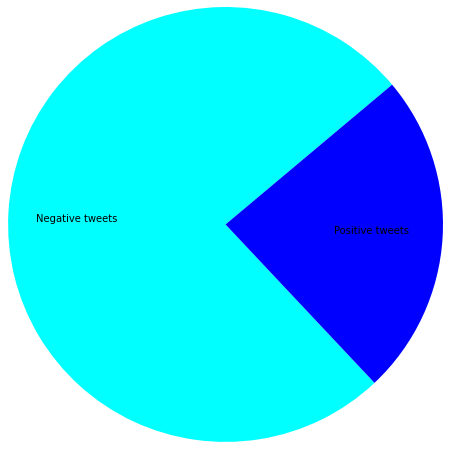

In [79]:
plt.pie(list(tweet_in.label.value_counts()), labels=['Negative tweets','Positive tweets'],
        labeldistance=0.5,radius= 2.5,startangle=40,colors= ['cyan',"blue"])
plt.show()

# Observations:
- There are about 506 positive tweets 
and 494 negative tweets

In [60]:
y_test_prob_log_reg=new_lr.predict_proba(test_inp)
y_test_prob_log_reg=pd.DataFrame(y_test_prob_log_reg)
y_test_prob_log_reg=y_test_prob_log_reg.iloc[:,1]

In [61]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, threshold = roc_curve(y_test.label,y_test_prob_log_reg)

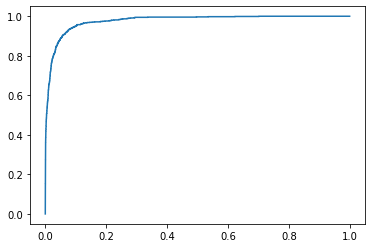

In [62]:
plt.plot(fpr,tpr)

In [63]:
roc_auc_score(y_test.label,y_test_prob_log_reg)

0.9768890920477405

In [64]:
y_prob_d_Tree=clf.predict_proba(test_inp)
y_prob_d_Tree=pd.DataFrame(y_prob_d_Tree)

In [65]:
y_prob_d_Tree=y_prob_d_Tree.iloc[:,1]


In [66]:
fpr, tpr, threshold = roc_curve(y_test.label,y_prob_d_Tree)

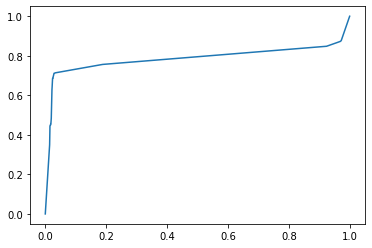

In [67]:
plt.plot(fpr,tpr)

SyntaxError: invalid syntax (<ipython-input-68-2ad8b2b0f540>, line 1)